In [2]:
from task import *
import sys
import json

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

In [3]:
def solve_task_id(task_id, train, test, task_type="training"):
    """
    solves a given task and saves the solution to a file
    """

    task = Task(task_id,train,test)

    abstraction, solution_apply_call, error, train_error, solving_time, nodes_explored = task.solve(
        shared_frontier=True, time_limit=1800, do_constraint_acquisition=True, save_images=True)

    solution = {"abstraction": abstraction, "apply_call": solution_apply_call, "train_error": train_error,
                "test_error": error, "time": solving_time, "nodes_explored": nodes_explored}

    if not os.path.exists('solutions'):
        os.makedirs('solutions')
    if error == 0:
        if not os.path.exists('solutions/correct'):
            os.makedirs('solutions/correct')
        with open('solutions/correct/solutions_{}'.format(task_id), 'w') as fp:
            json.dump(solution, fp)
    else:
        if not os.path.exists('solutions/incorrect'):
            os.makedirs('solutions/incorrect')
        with open('solutions/incorrect/solutions_{}'.format(task_id), 'w') as fp:
            json.dump(solution, fp)
    print(solution)

In [4]:
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data


In [5]:
def plot_task(task, task_solutions, i, t):
    """    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app    """

    num_train = len(task['train'])
    num_test = len(task['test'])

    w = num_train + num_test
    fig, axs = plt.subplots(2, w, figsize=(3 * w, 3 * 2))
    plt.suptitle(f'Set #{i}, {t}:', fontsize=20, fontweight='bold', y=1)
    # plt.subplots_adjust(hspace = 0.15)
    # plt.subplots_adjust(wspace=20, hspace=20)

    for j in range(num_train):
        plot_one(axs[0, j], j, 'train', 'input',task)
        plot_one(axs[1, j], j, 'train', 'output', task)

    plot_one(axs[0, j + 1], 0, 'test', 'input',task)

    cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
                                  '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    answer = task_solutions
    input_matrix = answer

    axs[1, j + 1].imshow(input_matrix, cmap=cmap, norm=norm)
    axs[1, j + 1].grid(True, which='both', color='lightgrey', linewidth=0.5)
    axs[1, j + 1].set_yticks([x - 0.5 for x in range(1 + len(input_matrix))])
    axs[1, j + 1].set_xticks([x - 0.5 for x in range(1 + len(input_matrix[0]))])
    axs[1, j + 1].set_xticklabels([])
    axs[1, j + 1].set_yticklabels([])
    axs[1, j + 1].set_title('Test output')

    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black')  # substitute 'k' for black
    fig.patch.set_facecolor('#dddddd')

    plt.tight_layout()
    plt.show()

    print()
    print()


In [6]:
def plot_one(ax, i, train_or_test, input_or_output,task):
    cmap = colors.ListedColormap(['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
                                  '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)

    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x - 0.5 for x in range(1 + len(input_matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(input_matrix))])

    ax.set_title(train_or_test + ' ' + input_or_output)

In [7]:
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

_cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plotting_examples = False

if plotting_examples:
    plt.figure(figsize=(3, 1), dpi=150)
    plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
    plt.xticks(list(range(10)))
    plt.yticks([])
    plt.show()



In [8]:
# base_path = '/kaggle/input/arc-prize-2024/'
base_path = './dataset/'
# Loading JSON data

training_challenges = load_json(base_path + 'training/arc-agi_training_challenges.json')
training_solutions = load_json(base_path + 'training/arc-agi_training_solutions.json')

evaluation_challenges = load_json(base_path + 'evaluation/arc-agi_evaluation_challenges.json')
evaluation_solutions = load_json(base_path + 'evaluation/arc-agi_evaluation_solutions.json')

test_challenges = load_json(base_path + 'test/arc-agi_test_challenges.json')


In [9]:
if plotting_examples:
    for i in range(0, 10):
        t = list(training_challenges)[i]
        task = training_challenges[t]
        task_solution = training_solutions[t][0]
        # print(f'Set #{i}, {t}')
        plot_task(task, task_solution, i, t)


007bbfb7


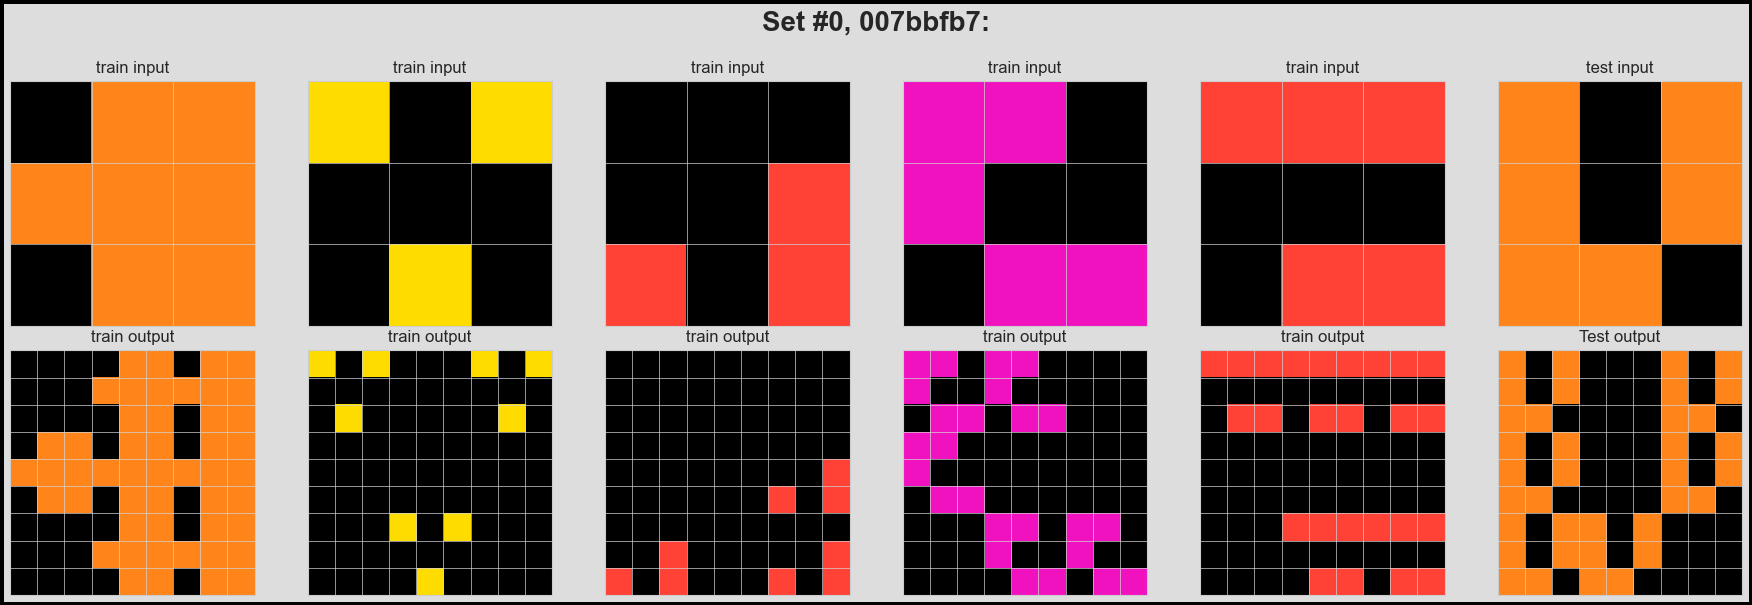



Running task.solve() for #007bbfb7
Initializing Frontier
Expanding frontier node with abstraction na
Found 1 Applicable Filters
Number of New Candidate Nodes = 8


KeyError: (0, 3)

In [10]:
task_type = 'training'

for task_no in range(20):
    #task_no = 7
    
    t = list(training_challenges)[task_no]
    train= training_challenges[t]
    task_solution = training_solutions[t][0]
    
    print(t)
    
    plot_task(training_challenges[t], task_solution, task_no, t)
    
    solve_task_id(t,train,task_solution,task_type)